In [348]:
import pandas as pd
import numpy as np
data=pd.read_csv('train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [349]:
data=np.array(data)
m,n=data.shape
m,n

(42000, 785)

In [350]:
np.random.shuffle(data)
data

array([[2, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [351]:
#1000 images and Transpose

dev_data=data[0:1000].T

dev_data.shape

(785, 1000)

In [352]:
dev_data

array([[2, 4, 3, ..., 0, 5, 8],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [353]:
# Labels of the data
Y_dev=dev_data[0] 
# Pixel values of the input
X_dev=dev_data[1:n]/255.
X_dev.shape


(784, 1000)

In [354]:
train_data=data[1000:m].T
train_data.shape

#labels for train data
Y_train=train_data[0]

# 784 X 41000
X_train=train_data[1:n]/255.
print(X_train.shape,Y_train.shape)

(784, 41000) (41000,)


In [355]:
def init_params():
    W1=np.random.rand(20,784)-0.5 #[-0.5 ,0.5)
    b1=np.random.rand(20,1)-0.5
    W2=np.random.rand(200,20)-0.5 #[-0.5 ,0.5)
    b2=np.random.rand(200,1)-0.5
    W3=np.random.rand(20,200)-0.5
    b3=np.random.rand(20,1)-0.5
    W4=np.random.rand(10,20)-0.5
    b4=np.random.rand(10,1)-0.5

    return W1,b1,W2,b2,W3,b3,W4,b4

def softmax(Z):
    # return np.exp(Z)/np.sum(np.exp(Z),axis=0)
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    

def Relu(Z):
    return np.maximum(Z,0)

def ReLU_deriv(Z):
    return Z > 0

def forward_prop(W1, b1, W2, b2, W3,b3,W4,b4,X):
    # Z1=np.dot(W1,X)+b1
    #100X41000
    Z1=W1.dot(X)+b1

    #100x41000
    A1=Relu(Z1)

    # print("A1: ",A1.shape)
    #100x41000
    Z2 = W2.dot(A1) + b2

    #100x41000
    A2 = Relu(Z2)

    Z3 = W3.dot(A2) + b3

    A3 = Relu(Z3)

    #10x41000
    Z4 = W4.dot(A3) + b4

    #10x41000
    A4 = softmax(Z4)
    
    return Z1, A1, Z2, A2 ,Z3 ,A3 ,Z4 ,A4

def one_hot(Y):
    One_hot_out=np.zeros((Y.size,Y.max()+1))
    One_hot_out[np.arange(Y.size), Y]=1
    One_hot_out=One_hot_out.T
    return One_hot_out


def backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, W1, W2, W3, W4, X, Y):
    one_hot_Y = one_hot(Y)
    dZ4 = A4 - one_hot_Y
    dW4 = 1 / m * dZ4.dot(A3.T)
    db4 = 1 / m * np.sum(dZ4)

    # print("W3: ",W3.T.shape,"dZ3: ",dZ3.shape,"Z3: ",Z3.shape)
    #Hidden Layer
    dZ3 = W4.T.dot(dZ4) * ReLU_deriv(Z3)
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)

    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)

    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)

    return dW1, db1, dW2, db2, dW3, db3 ,dW4 ,db4

def update_params(W1, b1, W2, b2, W3 ,b3 ,W4 ,b4 ,dW1, db1, dW2, db2, dW3, db3, dW4, db4, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2  
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    W4 = W4 - alpha * dW4
    b4 = b4 - alpha * db4

    return W1, b1, W2, b2, W3, b3 ,W4 ,b4




In [356]:
def get_predictions(A):
    return np.argmax(A,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions==Y)/Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1,b1,W2,b2,W3,b3,W4,b4 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 ,Z3 ,A3 ,Z4 ,A4 = forward_prop(W1, b1, W2, b2, W3,b3,W4,b4,X)
        dW1, db1, dW2, db2, dW3, db3 ,dW4 ,db4 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, W1, W2, W3, W4, X, Y)
        W1, b1, W2, b2, W3, b3 ,W4 ,b4 = update_params(W1, b1, W2, b2, W3 ,b3 ,W4 ,b4 ,dW1, db1, dW2, db2, dW3, db3, dW4, db4, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            # print("dW2: ",dW2[0][0])
            # print("A2: ",A2.shape)
            # print("W1: ",W1[0])
            # print("A4: ",A4[0][0])
            print("A4 : ",A4[:,0])
            print("Sum: ",np.sum(A4[:,0]))
            predictions = get_predictions(A4)
            print("Accuracy: ",get_accuracy(predictions, Y))
    return W1, b1, W2, b2 ,W3 ,b3 ,W4 ,b4



In [357]:
W1, b1, W2, b2 ,W3 ,b3 ,W4 ,b4 = gradient_descent(X_train, Y_train, 0.10, 500)

# W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
A4 :  [2.68946350e-06 9.64669701e-11 6.76661155e-02 5.36905182e-08
 3.93076099e-03 1.38877836e-04 4.77929314e-13 9.26942266e-01
 1.90136048e-09 1.31923494e-03]
Sum:  1.0000000000000002
[7 7 7 ... 7 7 7] [7 1 6 ... 9 6 1]
Accuracy:  0.11124390243902439
Iteration:  10
A4 :  [0.04258023 0.04584203 0.15231654 0.11363401 0.22695466 0.02503198
 0.06578256 0.03672378 0.18410753 0.10702668]
Sum:  1.0
[4 9 9 ... 4 9 1] [7 1 6 ... 9 6 1]
Accuracy:  0.20724390243902438
Iteration:  20
A4 :  [0.02830674 0.05807289 0.10943687 0.09014707 0.14306842 0.04863233
 0.10074494 0.07136438 0.20897572 0.14125064]
Sum:  1.0000000000000002
[8 9 6 ... 9 9 1] [7 1 6 ... 9 6 1]
Accuracy:  0.2556341463414634
Iteration:  30
A4 :  [0.00658931 0.06605184 0.03911588 0.04405725 0.0395479  0.09120418
 0.08637603 0.26772583 0.20757006 0.15176173]
Sum:  1.0
[7 1 6 ... 9 0 1] [7 1 6 ... 9 6 1]
Accuracy:  0.348
Iteration:  40
A4 :  [5.95679164e-04 2.67340860e-02 7.25330134e-03 1.23736173e-02
 6.16968393e-03 6.5

KeyboardInterrupt: 

In [ ]:
from matplotlib import pyplot as plt

def make_predictions(X, W1, b1, W2, b2 ,W3 ,b3 ,W4 ,b4):
    _, _, _, _ ,_ ,_ ,_ ,A4 = forward_prop(W1, b1, W2, b2, W3,b3,W4,b4,X)
    predictions = get_predictions(A4)
    return predictions

def test_prediction(index, W1, b1, W2, b2 ,W3 ,b3, W4, b4):
    current_image = X_dev[:, index, None]
    prediction = make_predictions(X_dev[:, index, None], W1, b1, W2, b2, W3 ,b3 ,W4 ,b4)
    label = Y_dev[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    return (label,prediction[0])

In [ ]:
#Code to take the columns 

# current_image=np.zeros((784,1))
# for i in range(0,784):
#     current_image[i]=X_dev[i][3]
# current_image

# 784 X 1000
# X_dev.shape

ith iteration :  0 j index:  695
Prediction:  [4]
Label:  4


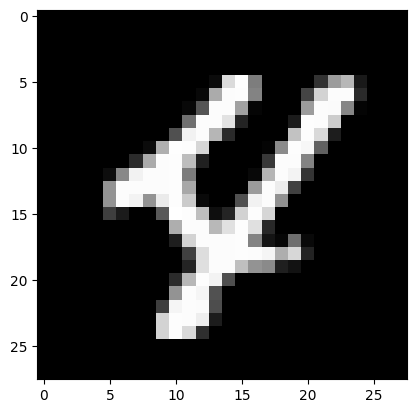

ith iteration :  1 j index:  546
Prediction:  [1]
Label:  1


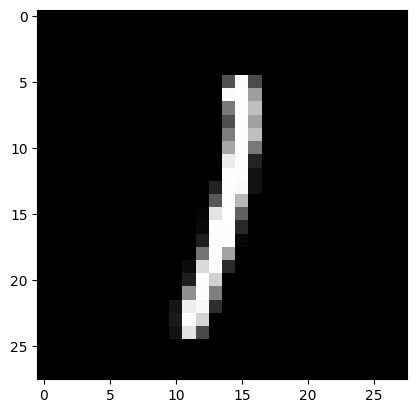

ith iteration :  2 j index:  901
Prediction:  [1]
Label:  1


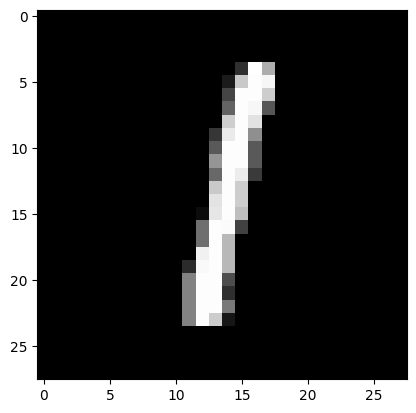

ith iteration :  3 j index:  153
Prediction:  [6]
Label:  6


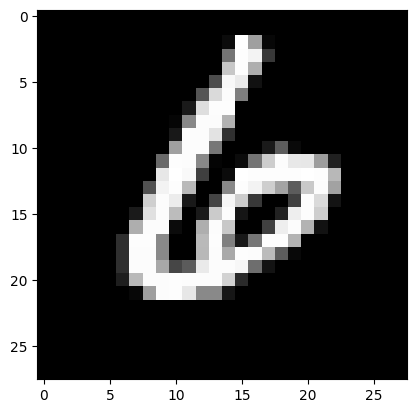

ith iteration :  4 j index:  39
Prediction:  [6]
Label:  6


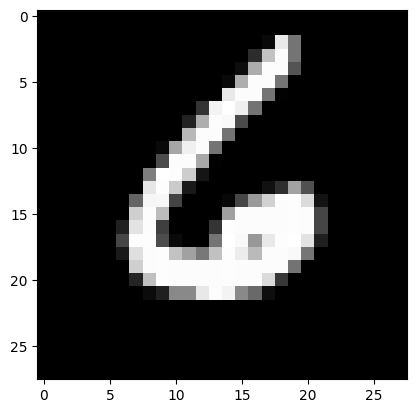

ith iteration :  5 j index:  407
Prediction:  [9]
Label:  9


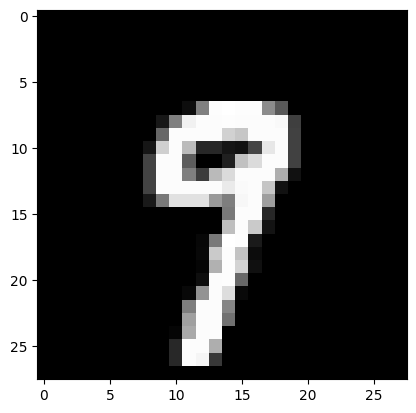

ith iteration :  6 j index:  931
Prediction:  [1]
Label:  1


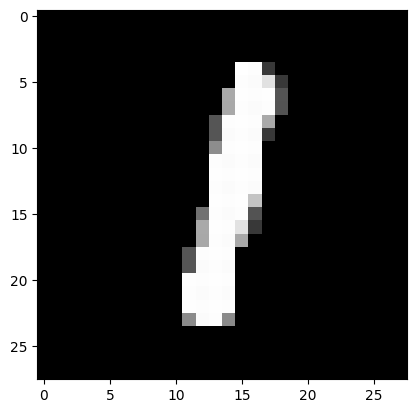

ith iteration :  7 j index:  249
Prediction:  [6]
Label:  6


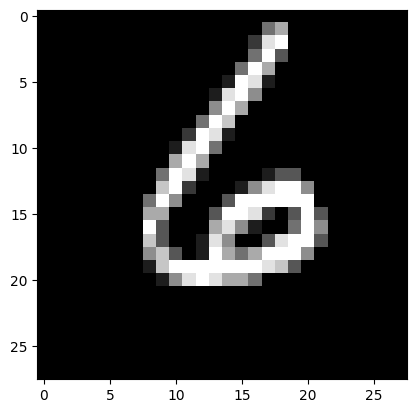

ith iteration :  8 j index:  99
Prediction:  [9]
Label:  7


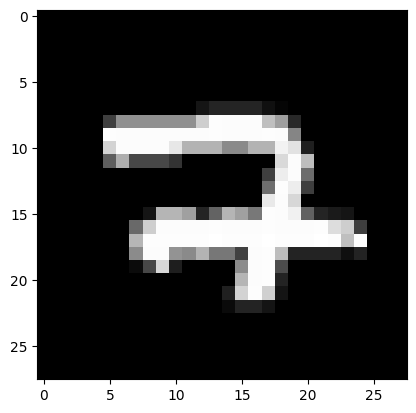

ith iteration :  9 j index:  209
Prediction:  [1]
Label:  1


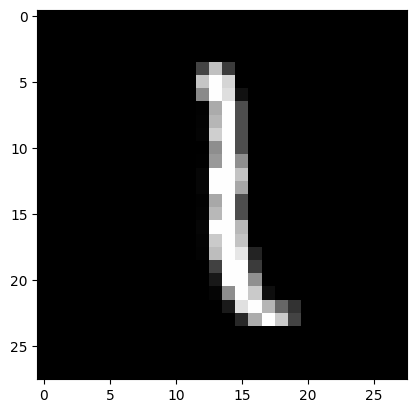

ith iteration :  10 j index:  811
Prediction:  [8]
Label:  8


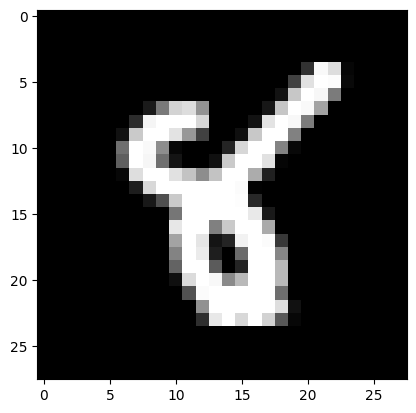

ith iteration :  11 j index:  802
Prediction:  [2]
Label:  2


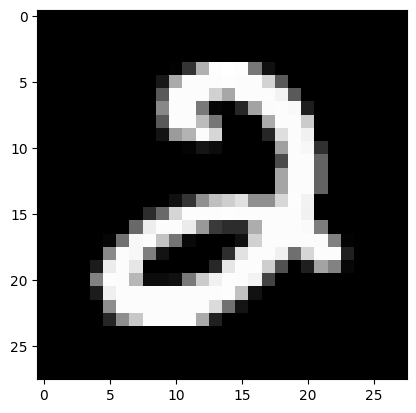

ith iteration :  12 j index:  182
Prediction:  [0]
Label:  0


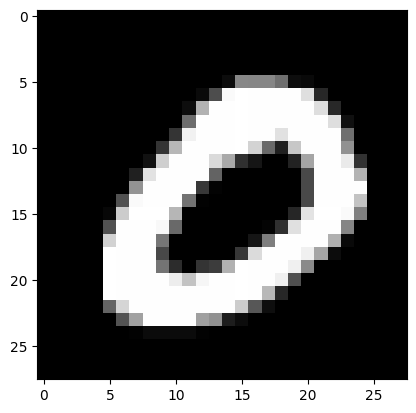

ith iteration :  13 j index:  638
Prediction:  [0]
Label:  0


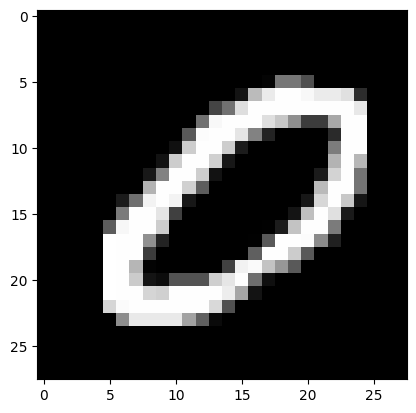

ith iteration :  14 j index:  16
Prediction:  [5]
Label:  5


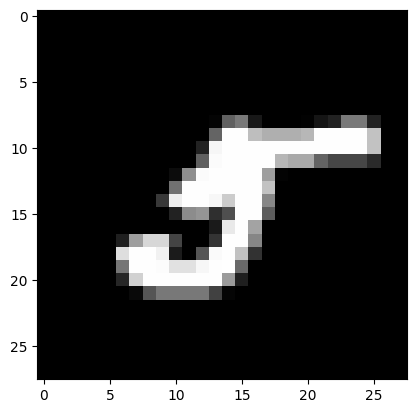

ith iteration :  15 j index:  355
Prediction:  [4]
Label:  4


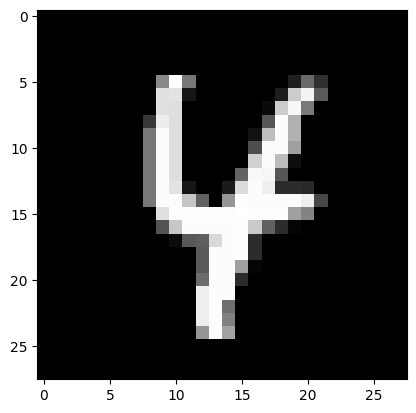

ith iteration :  16 j index:  3
Prediction:  [0]
Label:  0


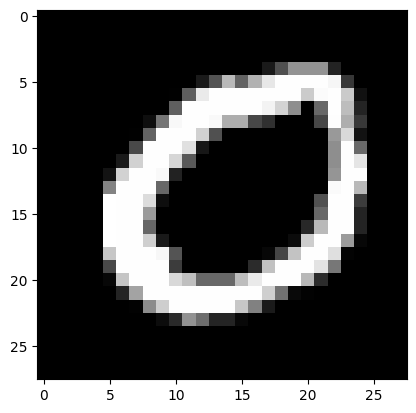

ith iteration :  17 j index:  687
Prediction:  [8]
Label:  4


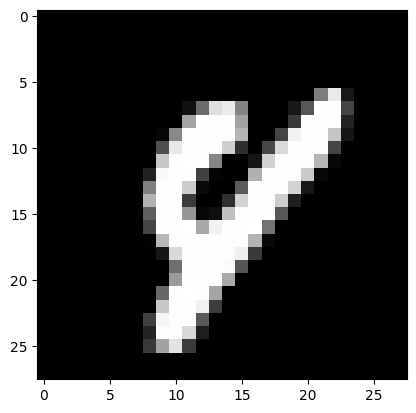

ith iteration :  18 j index:  783
Prediction:  [7]
Label:  7


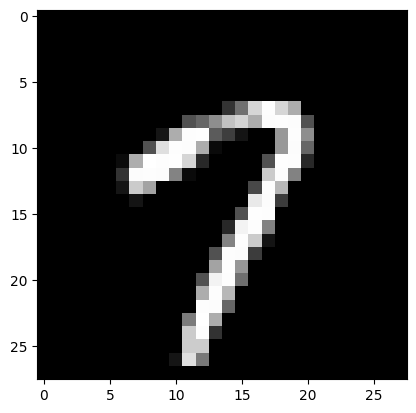

ith iteration :  19 j index:  402
Prediction:  [0]
Label:  0


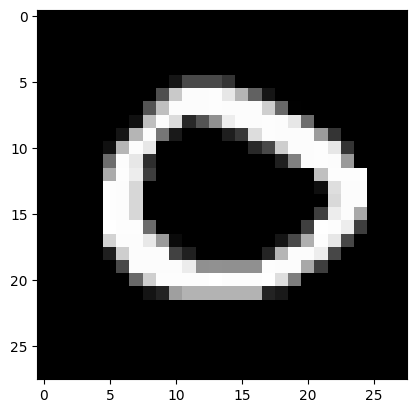

ith iteration :  20 j index:  655
Prediction:  [6]
Label:  6


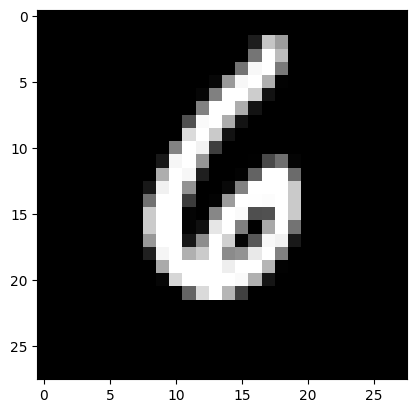

ith iteration :  21 j index:  883
Prediction:  [5]
Label:  5


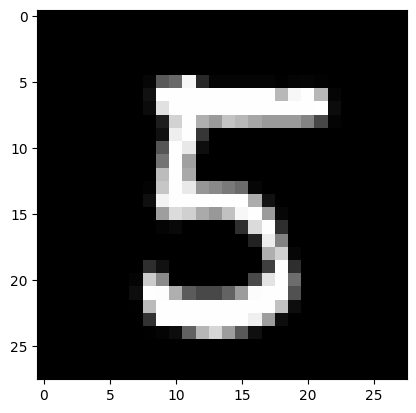

ith iteration :  22 j index:  291
Prediction:  [8]
Label:  8


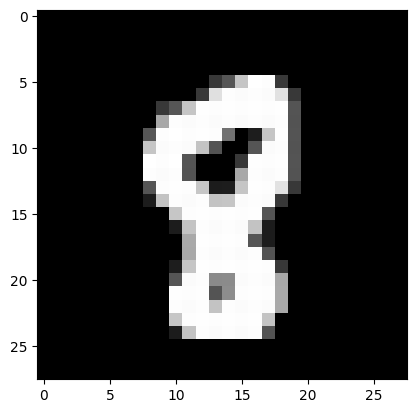

ith iteration :  23 j index:  170
Prediction:  [3]
Label:  3


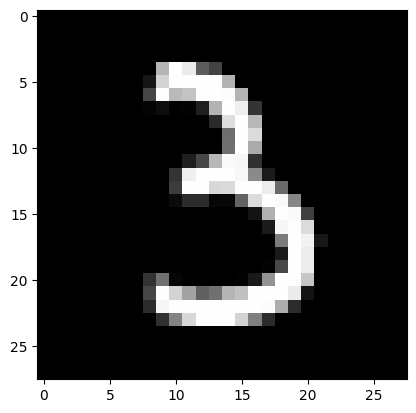

ith iteration :  24 j index:  542
Prediction:  [4]
Label:  4


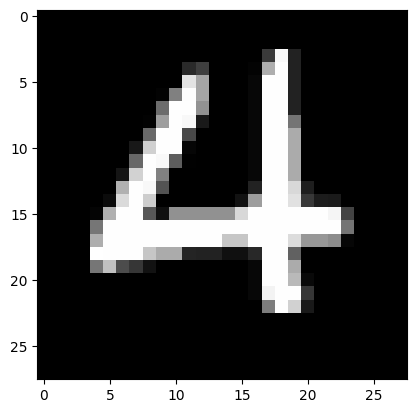

ith iteration :  25 j index:  312
Prediction:  [4]
Label:  4


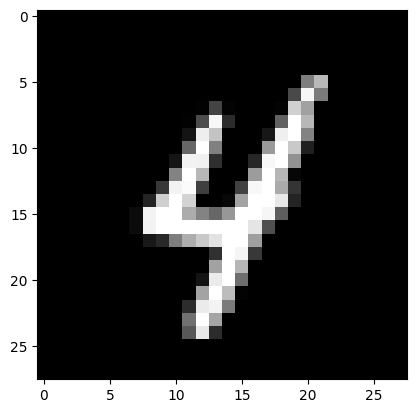

ith iteration :  26 j index:  125
Prediction:  [9]
Label:  3


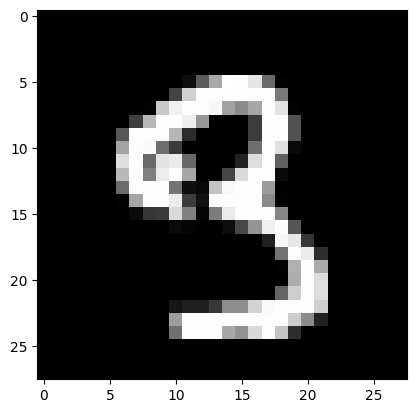

ith iteration :  27 j index:  175
Prediction:  [5]
Label:  5


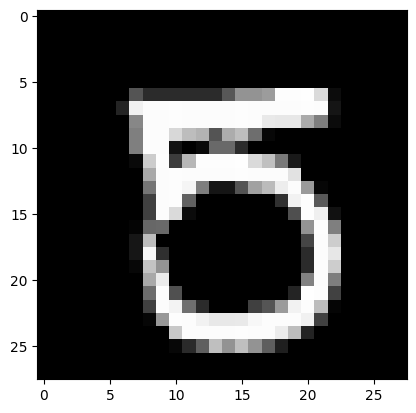

ith iteration :  28 j index:  235
Prediction:  [2]
Label:  2


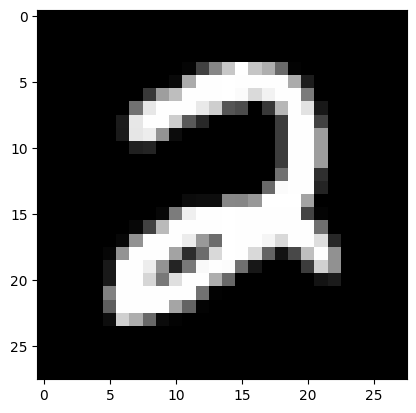

ith iteration :  29 j index:  57
Prediction:  [0]
Label:  0


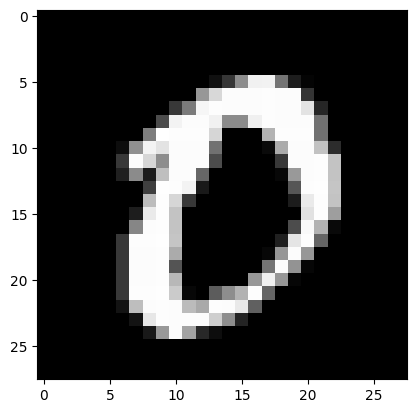

ith iteration :  30 j index:  636
Prediction:  [3]
Label:  3


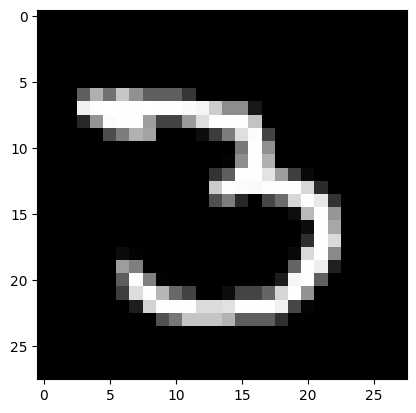

ith iteration :  31 j index:  439
Prediction:  [4]
Label:  4


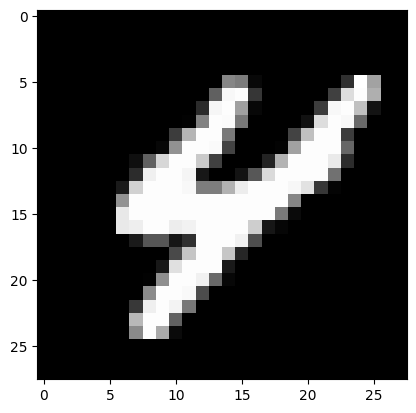

ith iteration :  32 j index:  187
Prediction:  [9]
Label:  9


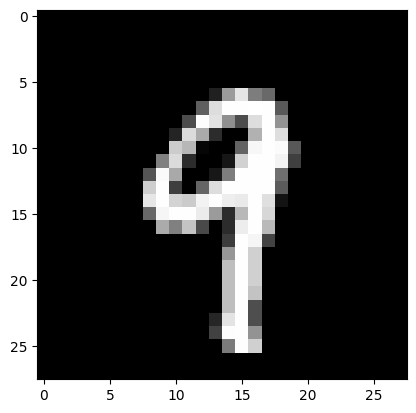

ith iteration :  33 j index:  218
Prediction:  [3]
Label:  3


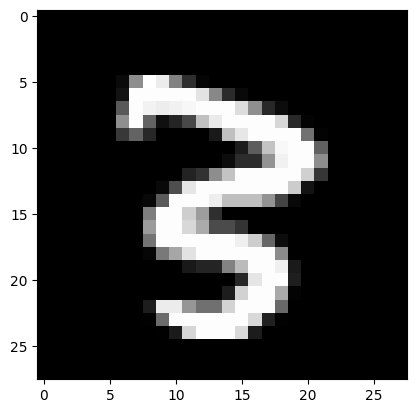

ith iteration :  34 j index:  119
Prediction:  [7]
Label:  7


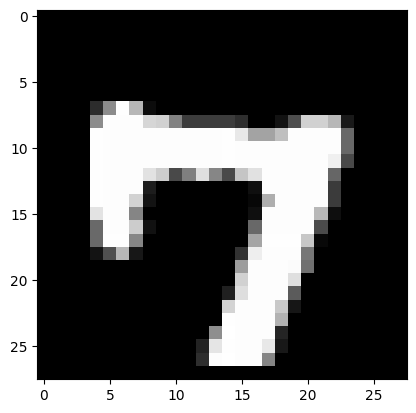

ith iteration :  35 j index:  605
Prediction:  [8]
Label:  8


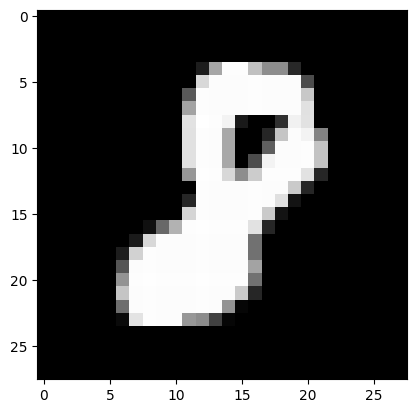

ith iteration :  36 j index:  568
Prediction:  [4]
Label:  4


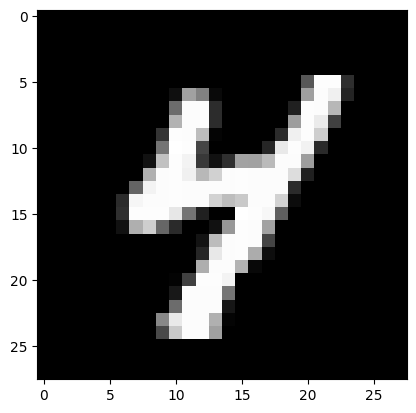

ith iteration :  37 j index:  990
Prediction:  [6]
Label:  6


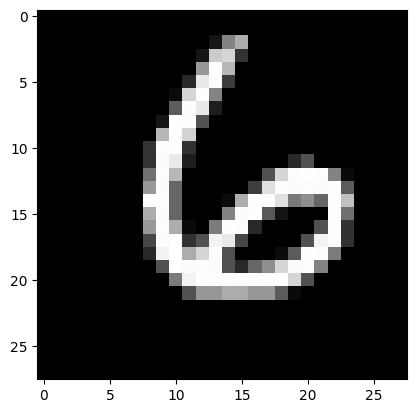

ith iteration :  38 j index:  906
Prediction:  [6]
Label:  6


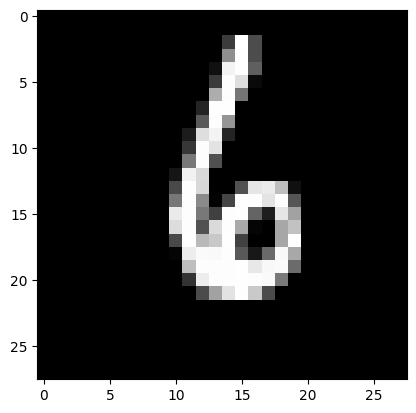

ith iteration :  39 j index:  837
Prediction:  [7]
Label:  9


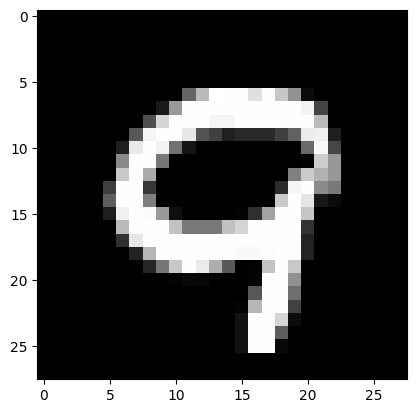

ith iteration :  40 j index:  603
Prediction:  [5]
Label:  5


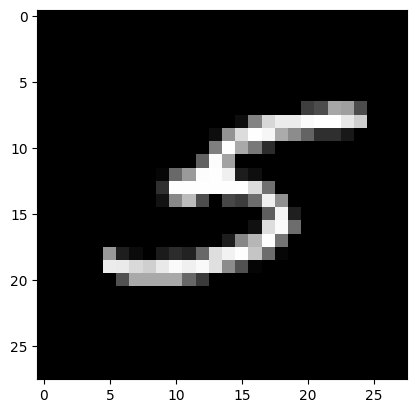

ith iteration :  41 j index:  400
Prediction:  [1]
Label:  1


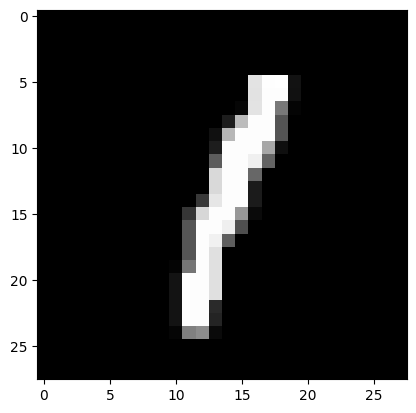

ith iteration :  42 j index:  714
Prediction:  [5]
Label:  0


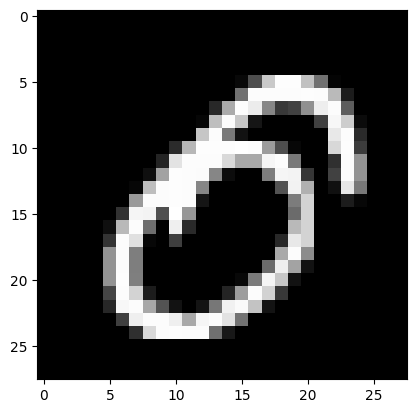

ith iteration :  43 j index:  154
Prediction:  [3]
Label:  3


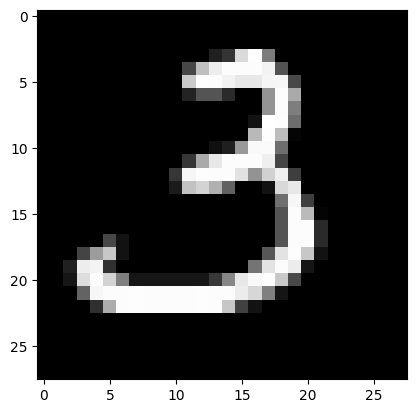

ith iteration :  44 j index:  26
Prediction:  [6]
Label:  6


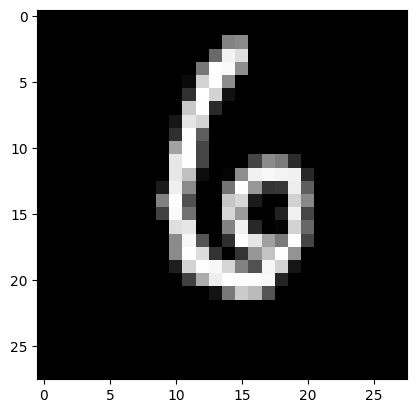

ith iteration :  45 j index:  148
Prediction:  [8]
Label:  3


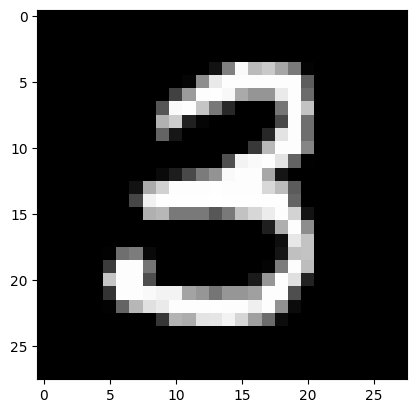

ith iteration :  46 j index:  908
Prediction:  [0]
Label:  0


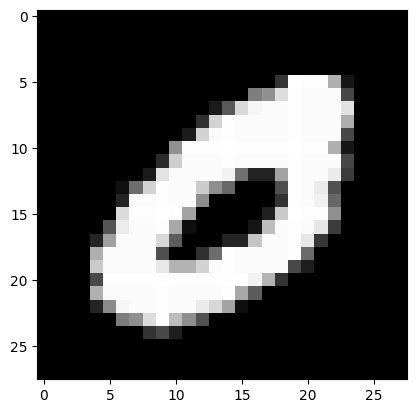

ith iteration :  47 j index:  880
Prediction:  [8]
Label:  8


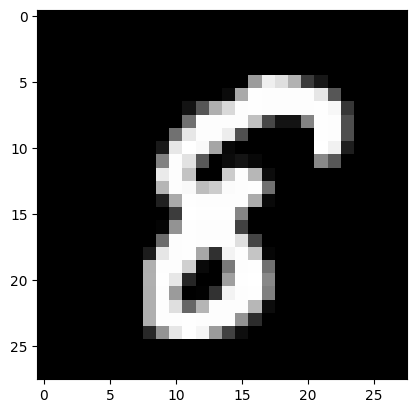

ith iteration :  48 j index:  694
Prediction:  [8]
Label:  6


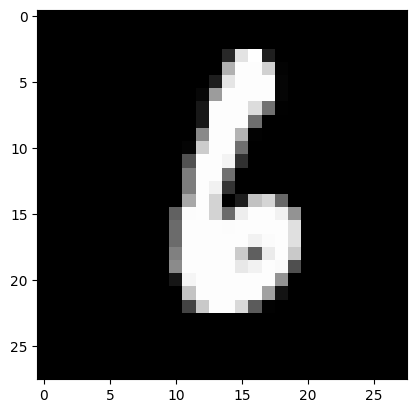

ith iteration :  49 j index:  935
Prediction:  [7]
Label:  7


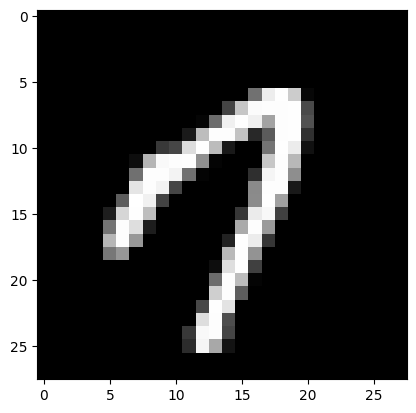

ith iteration :  50 j index:  856
Prediction:  [3]
Label:  3


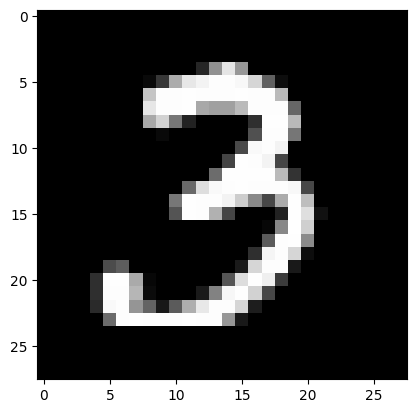

ith iteration :  51 j index:  916
Prediction:  [7]
Label:  7


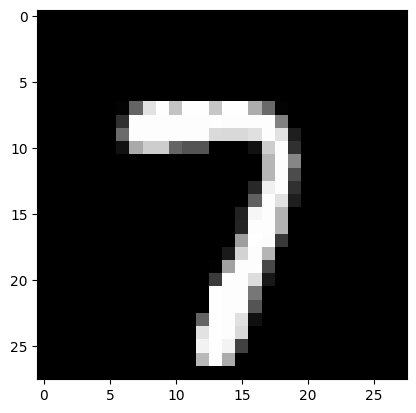

ith iteration :  52 j index:  485
Prediction:  [4]
Label:  4


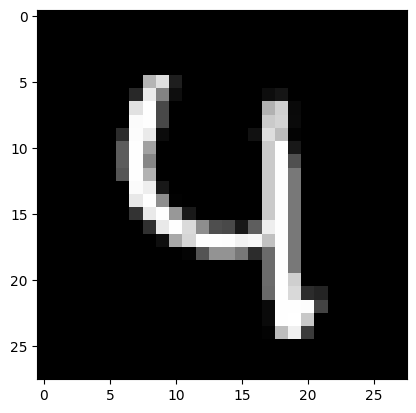

ith iteration :  53 j index:  34
Prediction:  [3]
Label:  3


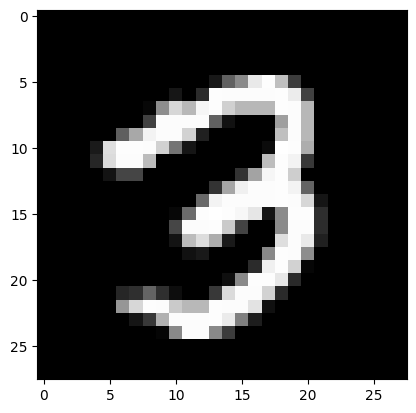

ith iteration :  54 j index:  801
Prediction:  [5]
Label:  5


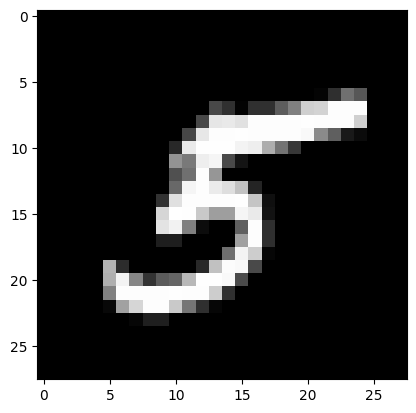

ith iteration :  55 j index:  11
Prediction:  [4]
Label:  4


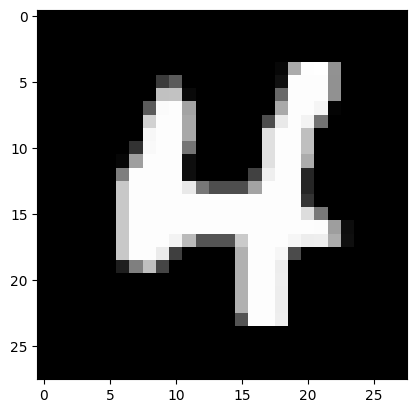

ith iteration :  56 j index:  259
Prediction:  [4]
Label:  4


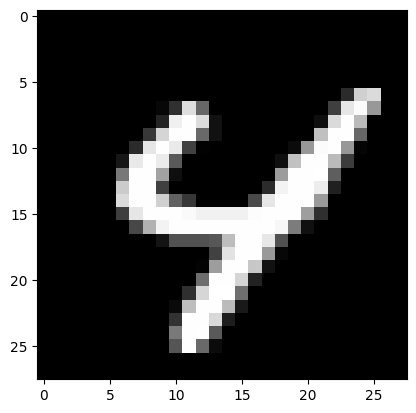

ith iteration :  57 j index:  934
Prediction:  [8]
Label:  8


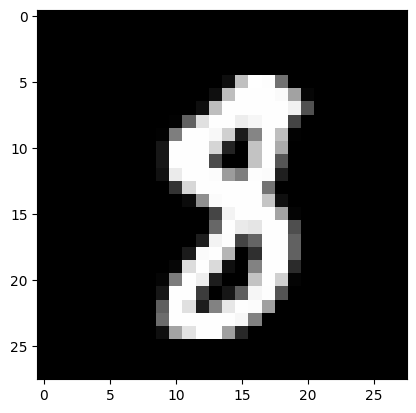

ith iteration :  58 j index:  162
Prediction:  [1]
Label:  1


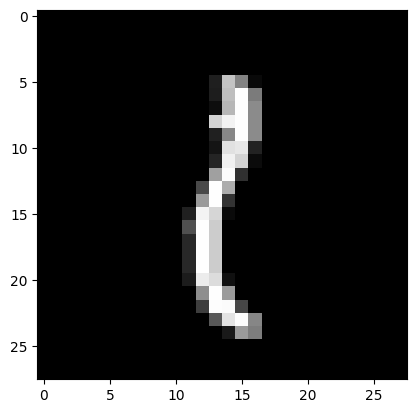

ith iteration :  59 j index:  91
Prediction:  [0]
Label:  0


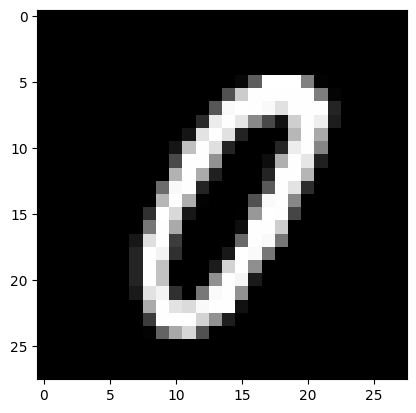

ith iteration :  60 j index:  997
Prediction:  [2]
Label:  2


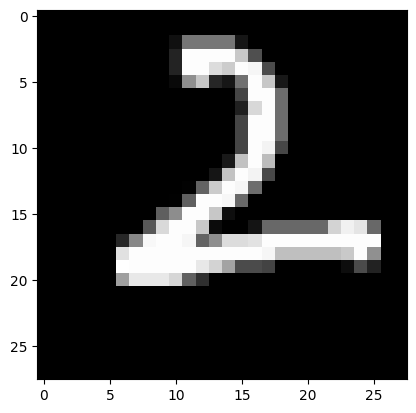

ith iteration :  61 j index:  24
Prediction:  [8]
Label:  9


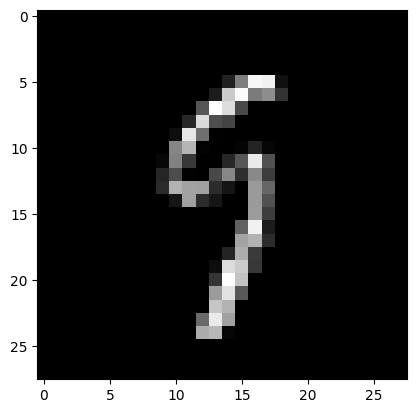

ith iteration :  62 j index:  76
Prediction:  [5]
Label:  3


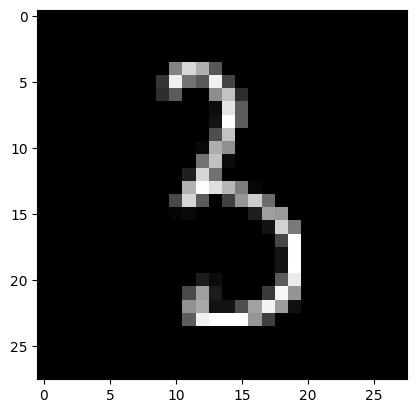

ith iteration :  63 j index:  113
Prediction:  [8]
Label:  8


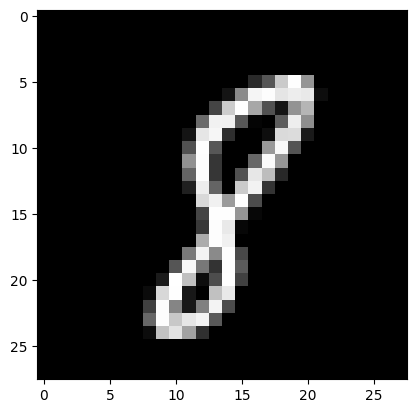

ith iteration :  64 j index:  348
Prediction:  [7]
Label:  7


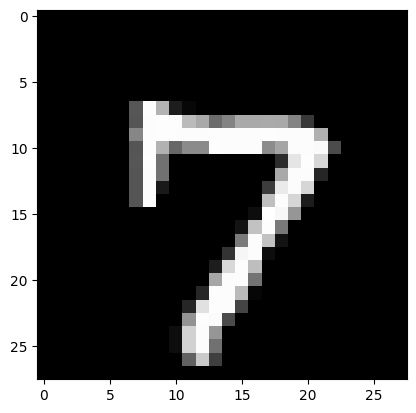

ith iteration :  65 j index:  340
Prediction:  [4]
Label:  4


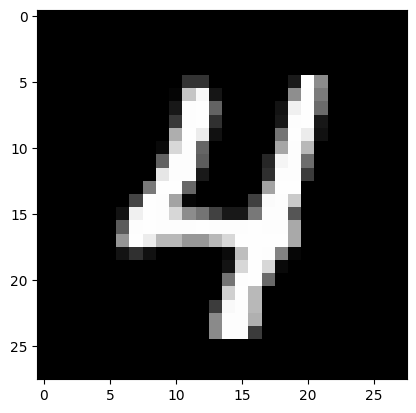

ith iteration :  66 j index:  548
Prediction:  [0]
Label:  0


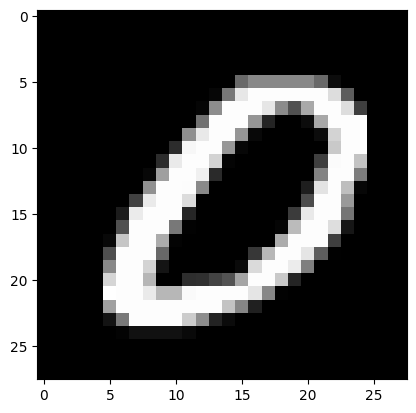

ith iteration :  67 j index:  756
Prediction:  [5]
Label:  5


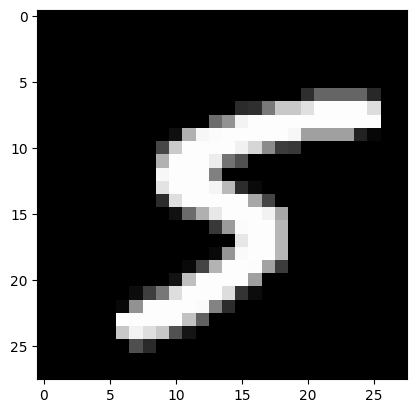

ith iteration :  68 j index:  979
Prediction:  [6]
Label:  6


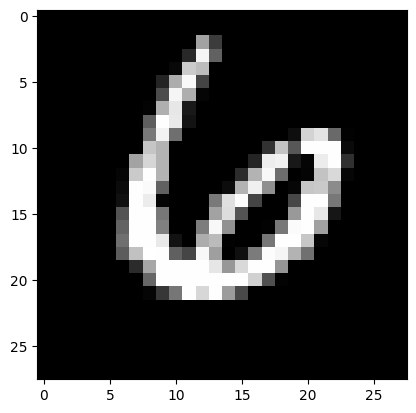

ith iteration :  69 j index:  942
Prediction:  [2]
Label:  2


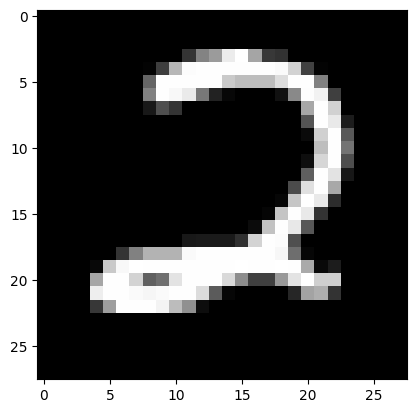

ith iteration :  70 j index:  558
Prediction:  [4]
Label:  4


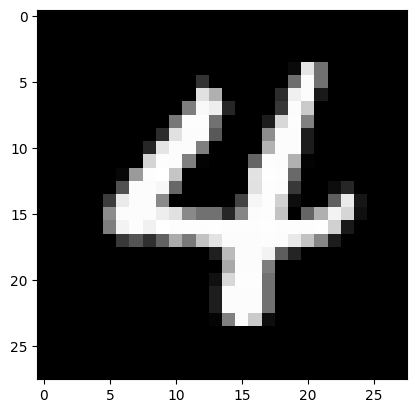

ith iteration :  71 j index:  736
Prediction:  [4]
Label:  4


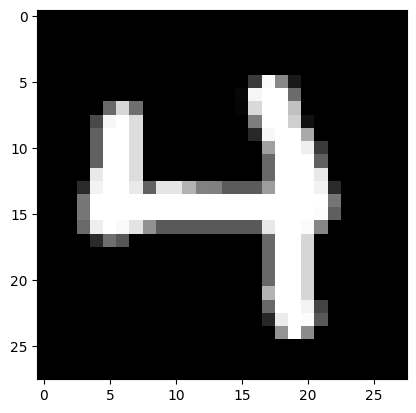

ith iteration :  72 j index:  37
Prediction:  [2]
Label:  2


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [ ]:
# test_prediction(0, W1, b1, W2, b2)
# test_prediction(1, W1, b1, W2, b2)
# test_prediction(2, W1, b1, W2, b2)
# test_prediction(2000, W1, b1, W2, b2)

import random

correct=0

for i in range(0,100):
    
    j=random.randint(0,999)
    print("ith iteration : ",i,"j index: ",j)
    (label,prediction)=test_prediction(j,W1,b1,W2,b2,W3,b3,W4,b4)
    if(label==prediction):
        correct=correct+1

print("correct: ",correct)